In [12]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Remove rows with NaN in 'flipper_length_mm' and 'species'
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Create a histogram for each species
species_list = penguins['species'].unique()

# Initialize the figure
fig = go.Figure()

# Loop through each species and add traces to the figure
for species in species_list:
    species_data = penguins[penguins['species'] == species]['flipper_length_mm']
    
    # Calculate statistics
    mean = species_data.mean()
    median = species_data.median()
    flipper_min = species_data.min()
    flipper_max = species_data.max()
    std = species_data.std()
    q1 = species_data.quantile(0.25)
    q3 = species_data.quantile(0.75)
    
    # Add histogram
    fig.add_trace(go.Histogram(
        x=species_data,
        name=species,
        opacity=0.6
    ))
    
    # Add vertical lines for mean and median
    fig.add_vline(x=mean, line_width=2, line_dash="dash", line_color="blue",
                  annotation_text=f"Mean ({species})", annotation_position="top left")
    fig.add_vline(x=median, line_width=2, line_dash="dot", line_color="green",
                  annotation_text=f"Median ({species})", annotation_position="top right")
    
    # Add rectangles for range, IQR, and 2 std dev from mean
    fig.add_vrect(x0=flipper_min, x1=flipper_max, line_width=0, fillcolor="lightgray", opacity=0.2,
                  annotation_text=f"Range ({species})", annotation_position="bottom left")
    
    fig.add_vrect(x0=q1, x1=q3, line_width=0, fillcolor="orange", opacity=0.2,
                  annotation_text=f"IQR ({species})", annotation_position="bottom right")
    
    fig.add_vrect(x0=mean - 2*std, x1=mean + 2*std, line_width=0, fillcolor="lightblue", opacity=0.2,
                  annotation_text=f"±2 Std Dev ({species})", annotation_position="top left")

# Update layout
fig.update_layout(
    title="Distribution of Flipper Length by Species",
    xaxis_title="Flipper Length (mm)",
    yaxis_title="Count",
    barmode='overlay',
    template='plotly_white',
    margin=dict(t=100, b=40, l=40, r=40))

# Show the figure
fig.show()


In [ ]:
# https://chatgpt.com/share/66f5ab57-1ccc-800f-812b-3911a9dc4e50

/tmp/ipykernel_53/2487686273.py:33: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/tmp/ipykernel_53/2487686273.py:33: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/tmp/ipykernel_53/2487686273.py:33: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




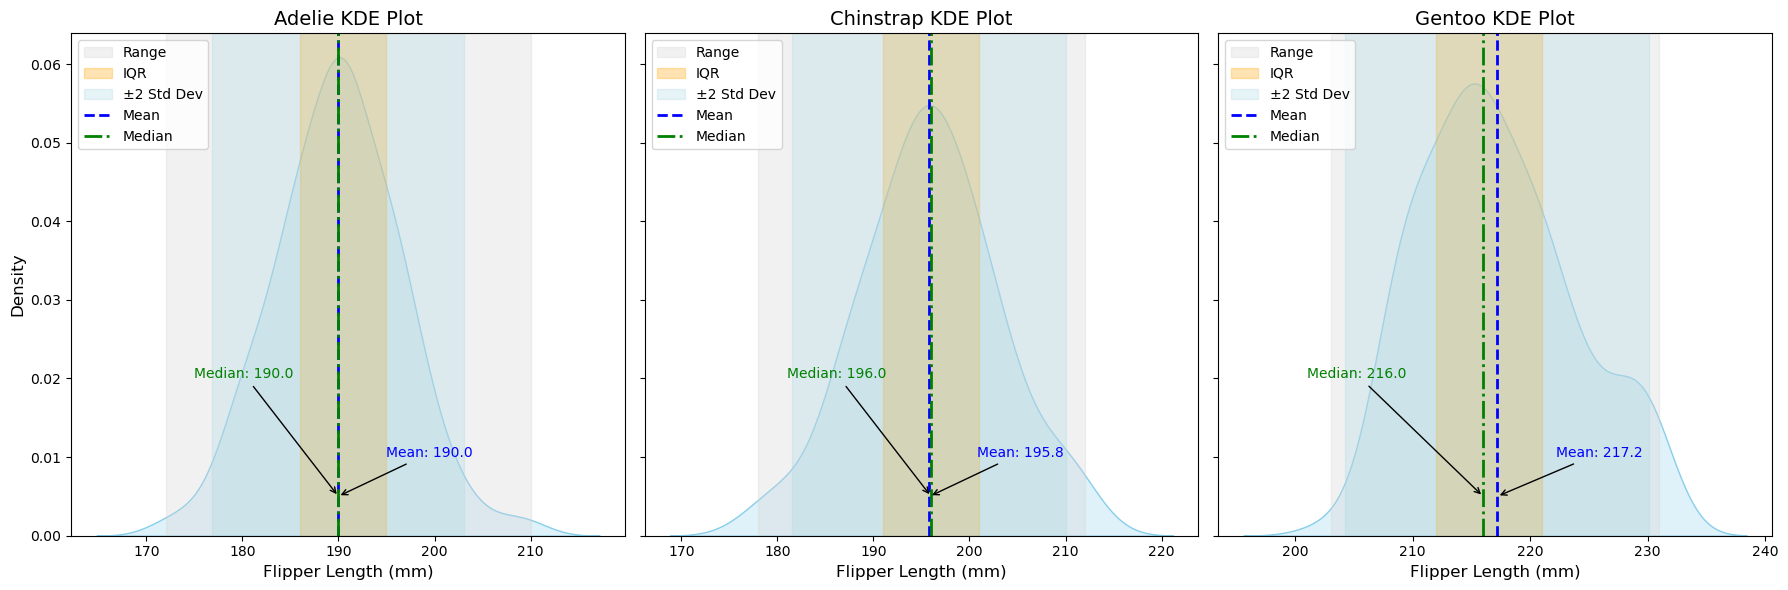

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Remove rows with NaN in 'flipper_length_mm' and 'species'
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Create a list of unique species
species_list = penguins['species'].unique()

# Set up the figure with 3 subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Loop through each species and create a KDE plot
for i, species in enumerate(species_list):
    # Subset data for the current species
    species_data = penguins[penguins['species'] == species]['flipper_length_mm']
    
    # Calculate key statistics
    mean = species_data.mean()
    median = species_data.median()
    flipper_min = species_data.min()
    flipper_max = species_data.max()
    std = species_data.std()
    q1 = species_data.quantile(0.25)
    q3 = species_data.quantile(0.75)
    
    # Plot KDE for the species
    sns.kdeplot(species_data, ax=axes[i], shade=True, color="skyblue")
    
    # Set title and labels
    axes[i].set_title(f"{species} KDE Plot", fontsize=14)
    axes[i].set_xlabel("Flipper Length (mm)", fontsize=12)
    axes[i].set_ylabel("Density", fontsize=12)
    
    # Add vertical lines and shaded regions
    # Range (min to max)
    axes[i].axvspan(flipper_min, flipper_max, color='lightgray', alpha=0.3, label="Range")
    
    # Interquartile Range (IQR: Q1 to Q3)
    axes[i].axvspan(q1, q3, color='orange', alpha=0.3, label="IQR")
    
    # ±2 Standard Deviations
    axes[i].axvspan(mean - 2*std, mean + 2*std, color='lightblue', alpha=0.3, label="±2 Std Dev")
    
    # Add vertical lines for mean and median
    axes[i].axvline(mean, color='blue', linestyle='--', label='Mean', linewidth=2)
    axes[i].axvline(median, color='green', linestyle='-.', label='Median', linewidth=2)
    
    # Add text annotations
    axes[i].annotate(f'Mean: {mean:.1f}', xy=(mean, 0.005), xytext=(mean+5, 0.01),
                     arrowprops=dict(facecolor='blue', arrowstyle="->"), fontsize=10, color='blue')
    axes[i].annotate(f'Median: {median:.1f}', xy=(median, 0.005), xytext=(median-15, 0.02),
                     arrowprops=dict(facecolor='green', arrowstyle="->"), fontsize=10, color='green')
    
    # Add legend
    axes[i].legend(loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
#Q3)box plots, histograms, and kernel density estimators

# https://chatgpt.com/share/66f5ab57-1ccc-800f-812b-3911a9dc4e50

In [22]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [23]:
#Q4):
#   Variance for A: 8.61, Mean: 5
#   Variance for B: 2.15, Mean: 5
#   Variance for C: 9.13, Mean: 5
#   Variance for D: 0.28, Mean: 6
#1) Set A and C have both similiar variences and similiar means.
#2) Set A and B have similiar means at around 5, but have variences of 8.61 and 2.15
#3) Similar variances, different means: B and D
#4) Different means and different variances: A and D

In [24]:
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)

In [ ]:
#Q5):
# Mean is the average value of a dataset, and Median is the middlemost value of the dataset.
# Mean can be affect by the outliers, and Median is 
# right-skewed means most of the data points are gather in the right side of the chart, means they have a larger x values.
# the mean is more likely to be greater than the median, since the right tail can puul the mean up.
# left-skewed means most of the data points are around the left part of the graph.
# it's more likely to have a mean smaller than the median.

# https://chatgpt.com/share/66f6178b-8144-800f-b5ea-b684c66c2f40

In [12]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
df # df.columns

,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (g),total fat (% daily value),saturated fat (g),saturated fat (% daily value),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
0,1000,100,0,4.8,300,120.0,13.0,20.0,5.0,25.0,...,31,10.0,4,17.0,3.0,17.0,10.0,0.0,25.0,15.0
1,1000,100,1,4.8,250,70.0,8.0,12.0,3.0,15.0,...,30,10.0,4,17.0,3.0,18.0,6.0,0.0,25.0,8.0
2,1000,100,2,3.9,370,200.0,23.0,35.0,8.0,42.0,...,29,10.0,4,17.0,2.0,14.0,8.0,0.0,25.0,10.0
3,1000,100,3,5.7,450,250.0,28.0,43.0,10.0,52.0,...,30,10.0,4,17.0,2.0,21.0,15.0,0.0,30.0,15.0
4,1000,100,4,5.7,400,210.0,23.0,35.0,8.0,42.0,...,30,10.0,4,17.0,2.0,21.0,6.0,0.0,25.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,3000,130,745,NaN,180,NaN,14.0,NaN,NaN,NaN,...,12,NaN,3,NaN,NaN,4.0,NaN,NaN,NaN,NaN
746,3000,130,746,NaN,190,NaN,18.0,NaN,NaN,NaN,...,6,NaN,3,NaN,NaN,7.0,NaN,NaN,NaN,NaN
747,3000,100,747,NaN,340,NaN,13.0,NaN,NaN,NaN,...,38,NaN,0,NaN,NaN,18.0,NaN,NaN,NaN,NaN
748,3000,100,748,NaN,90,NaN,8.0,NaN,NaN,NaN,...,5,NaN,4,NaN,NaN,1.0,NaN,NaN,NaN,NaN


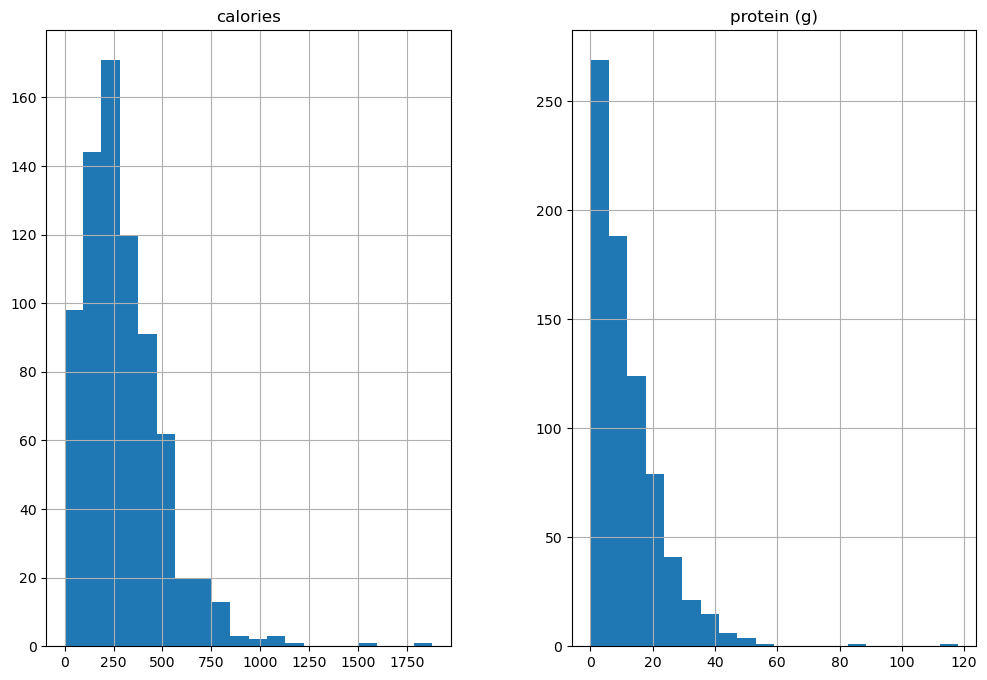

In [13]:
insteresting_column = ['calories', 'total fat (g)', 'protein (g)']

df[columns_of_interest].hist(bins=20, figsize=(12, 8))

import plotly.graph_objects as go
fig = go.Figure()
fig.update_layout(title='Histograms of Calories, Total Fat, and Protein Content')
fig.show()


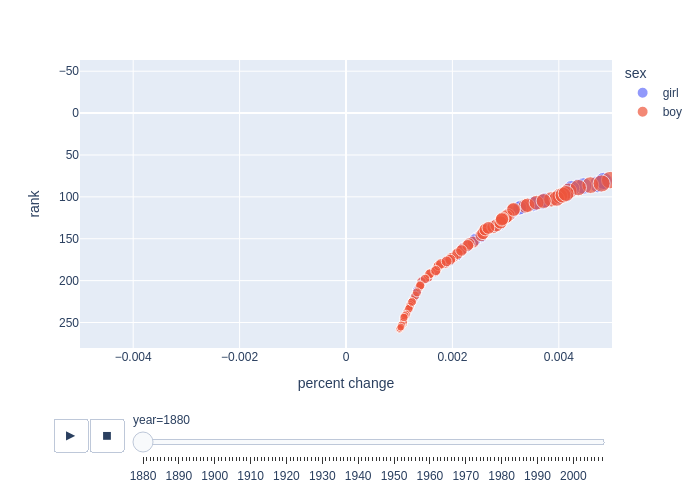

In [17]:
import pandas as pd
import plotly.express as px

bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

bn['name'] = bn['name'] + " " + bn['sex'] 

bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)

bn = bn.sort_values(['name', 'year'])

bn['percent change'] = bn['percent'].diff()

new_name = [True] + list(bn.name[:-1].values != bn.name[1:].values)
bn.loc[new_name, 'percent change'] = bn.loc[new_name, 'percent']

bn = bn.sort_values('year')

bn = bn[bn.percent > 0.001]

fig = px.scatter(bn, 
                 x="percent change", 
                 y="rank", 
                 animation_frame="year", 
                 animation_group="name", 
                 size="percent", 
                 color="sex", 
                 hover_name="name", 
                 size_max=50, 
                 range_x=[-0.005, 0.005]) 

fig.update_yaxes(autorange='reversed')

fig.show(renderer="png")


In [ ]:
# https://chatgpt.com/share/66f624e2-c288-800f-8547-225a4c1ab52c